# Example 10: slowly rising pulse stimulation

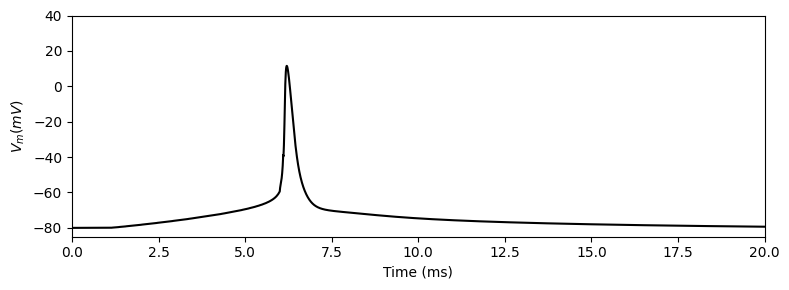

In [1]:
import nrv
import numpy as np
import matplotlib.pyplot as plt

model = 'MRG'
diam = 4
y = 0
z = 0
n_node = 20

t_sim = 20
t_start = 1
prep_d = 5
prep_a = 35
interp_delay = 0
pw = 100e-3
amp = 48


nseg = 1
material = nrv.load_material('endoneurium_bhadra')


L=nrv.get_length_from_nodes(diam,n_node)

axon = nrv.myelinated(y,z,diam,L,rec='nodes',dt=0.005,Nseg_per_sec=nseg,model=model) 

y_elec = 500
z_elec = 0
x_elec = axon.x_nodes[np.int32(n_node/2)]	# electrode y position, in [um]
E1 = nrv.point_source_electrode(x_elec,y_elec,z_elec)

# insert test spike

prepulse = nrv.stimulus()

slope = prep_a/prep_d
prepulse.ramp(slope, t_start, prep_d+t_start, 0.05)
pulse = nrv.stimulus()
pulse.biphasic_pulse(t_start+prep_d,amp,pw,0,0)
stim_1 = -prepulse+pulse
stim_1.s[-2] = -amp
stim_1.s[-1] = 0

#stim_1 = pulse
stim_extra = nrv.stimulation(material)
stim_extra.add_electrode(E1,stim_1)
axon.attach_extracellular_stimulation(stim_extra)

#axon1.insert_I_Clamp(t_position, t_start, t_duration, t_amplitude)       

# extra-cellular stimulation

# simulate axon activity
results = axon.simulate(t_sim=t_sim)#,footprints = footprints)


plt.figure(figsize=(8,3))
plt.plot(results['t'],results['V_mem'][10],color='k')
plt.ylabel("$V_m (mV)$")
plt.xlabel("Time (ms)")

plt.xlim(np.min(results['t']),np.max(results['t']))
plt.ylim(-85,40)
plt.tight_layout()
plt.show()
